In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('online retail.csv')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
df.shape

(541909, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


**Data Cleaning**

In [6]:
#change data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
#remove duplicates
df.duplicated().sum() 

5268

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(536641, 8)

In [11]:
#remove null values
df['CustomerID'].isnull().values.any()

True

In [12]:
df['CustomerID'].isna().sum()

135037

In [13]:
df['CustomerID'].dropna()

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 401604, dtype: float64

In [14]:
df = df[df['CustomerID'].notna()]

In [15]:
df.shape

(401604, 8)

In [16]:
#remove negative values in Quantity column
df['Quantity'].lt(0).any().any()

True

In [17]:
df['Quantity'].lt(0).sum()

8872

In [18]:
df = df[~(df['Quantity'] < 0)]

In [19]:
df.shape

(392732, 8)

In [20]:
df['UnitPrice'].lt(0).any().any()

False

In [21]:
df['CustomerID'] = df['CustomerID'].astype(int)

**Cohort Retention Analysis**

In [22]:
#find the earliest month of all orders
df['Inv_Date'] = pd.to_datetime(df['InvoiceDate'].dt.strftime('%Y-%m'))
df['start_date'] = min(df.Inv_Date)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Inv_Date,start_date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01


In [23]:
#calculate transaction_month_index: difference in months between invoice date and start date
df['Inv_Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Inv_Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df['Start_Year'] = pd.DatetimeIndex(df['start_date']).year
df['Start_Month'] = pd.DatetimeIndex(df['start_date']).month

In [24]:
df['transaction_month_index'] = (df['Inv_Year'] - df['Start_Year'])*12 + (df['Inv_Month']- df['Start_Month'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Inv_Date,start_date,Inv_Year,Inv_Month,Start_Year,Start_Month,transaction_month_index
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,2010,12,2010,12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,2010,12,2010,12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,2010,12,2010,12,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,2010,12,2010,12,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,2010,12,2010,12,0


In [25]:
#get cohort_month for each customer: difference in months between invoice date and this customer's first order date
df2 = df.groupby('CustomerID')['transaction_month_index'].min().reset_index()
df2 = df2.rename(columns={'transaction_month_index':'cohort_month'})
df2

,CustomerID,cohort_month
0,12346,1
1,12347,0
2,12348,0
3,12349,11
4,12350,2
...,...,...
4334,18280,3
4335,18281,6
4336,18282,8
4337,18283,1


In [27]:
#calculate cohort_index
#first, we need to join the above two dataframes to have cohort_month for all transactions.
df3 = df.join(df2.set_index('CustomerID'),on='CustomerID')
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Inv_Date,start_date,Inv_Year,Inv_Month,Start_Year,Start_Month,transaction_month_index,cohort_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,2010-12-01,2010-12-01,2010,12,2010,12,0,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,2010,12,2010,12,0,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,2010-12-01,2010-12-01,2010,12,2010,12,0,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,2010,12,2010,12,0,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,2010-12-01,2010-12-01,2010,12,2010,12,0,0


In [29]:
#next, calcluate cohort_index
df3['cohort_index'] = df3.transaction_month_index - df3.cohort_month
df3.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Inv_Date,start_date,Inv_Year,Inv_Month,Start_Year,Start_Month,transaction_month_index,cohort_month,cohort_index
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,2011-12-01,2010-12-01,2011,12,2010,12,12,8,4
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,2011-12-01,2010-12-01,2011,12,2010,12,12,8,4
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01,2010-12-01,2011,12,2010,12,12,8,4
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,2011-12-01,2010-12-01,2011,12,2010,12,12,8,4
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680,France,2011-12-01,2010-12-01,2011,12,2010,12,12,8,4


In [30]:
df4 = df3[['CustomerID', 'cohort_month', 'cohort_index']]
df4

,CustomerID,cohort_month,cohort_index
0,17850,0,0
1,17850,0,0
2,17850,0,0
3,17850,0,0
4,17850,0,0
...,...,...,...
541904,12680,8,4
541905,12680,8,4
541906,12680,8,4
541907,12680,8,4


In [31]:
#remove duplicates (multiple orders made by the same customer in the same month)
df5 = df4.drop_duplicates(subset=['CustomerID', 'cohort_month', 'cohort_index'], keep='first')
df5

,CustomerID,cohort_month,cohort_index
0,17850,0,0
9,13047,0,0
26,12583,0,0
46,13748,0,0
65,15100,0,0
...,...,...,...
541768,12713,12,0
541806,17581,0,12
541869,15804,5,7
541890,13113,0,12


In [32]:
#count the number of customers for each cohort_month and cohort_index
df6 = df5.groupby(['cohort_month','cohort_index'])['CustomerID'].count().reset_index()
df6 = df6.rename(columns={'CustomerID':'customer_count'})
df6

,cohort_month,cohort_index,customer_count
0,0,0,885
1,0,1,324
2,0,2,286
3,0,3,340
4,0,4,321
...,...,...,...
86,10,1,86
87,10,2,41
88,11,0,324
89,11,1,36


In [33]:
#pivot data 
df7 = df6.pivot_table(index = 'cohort_month', columns = 'cohort_index',values = 'customer_count')
df7

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
0,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
1,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
3,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
4,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
5,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
6,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
7,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
#convert values to percentages
df8 = df7.divide(df7.iloc[:,0],axis=0).round(4)*100
df8

cohort_index,0,1,2,3,4,5,6,7,8,9,10,11,12
cohort_month,,,,,,,,,,,,,
0,100.0,36.61,32.32,38.42,36.27,39.77,36.27,34.92,35.37,39.55,37.40,50.28,26.55
1,100.0,22.06,26.62,23.02,32.13,28.78,24.70,24.22,29.98,32.61,36.45,11.75,NaN
2,100.0,18.68,18.68,28.42,27.11,24.74,25.26,27.89,24.74,30.53,6.84,NaN,NaN
3,100.0,15.04,25.22,19.91,22.35,16.81,26.77,23.01,27.88,8.63,NaN,NaN,NaN
4,100.0,21.33,20.33,21.00,19.67,22.67,21.67,26.00,7.33,NaN,NaN,NaN,NaN
5,100.0,19.01,17.25,17.25,20.77,23.24,26.41,9.51,NaN,NaN,NaN,NaN,NaN
6,100.0,17.36,15.70,26.45,23.14,33.47,9.50,NaN,NaN,NaN,NaN,NaN,NaN
7,100.0,18.09,20.74,22.34,27.13,11.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100.0,20.71,24.85,24.26,12.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


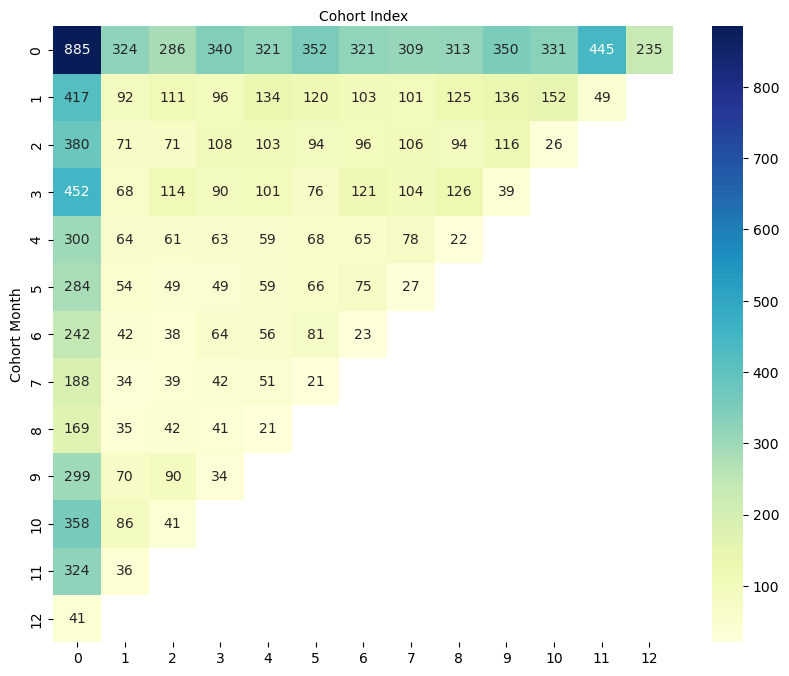

In [37]:
#plot the number of customers in each cohort_month and cohort_index
fig, ax = plt.subplots(1,1,figsize = (10,8)
                      )
sns.heatmap(df7, annot = True, cmap="YlGnBu", fmt='g')

ax.set_xlabel('Cohort Index')
ax.set_ylabel("Cohort Month")
ax.xaxis.set_label_position('top')

plt.show()

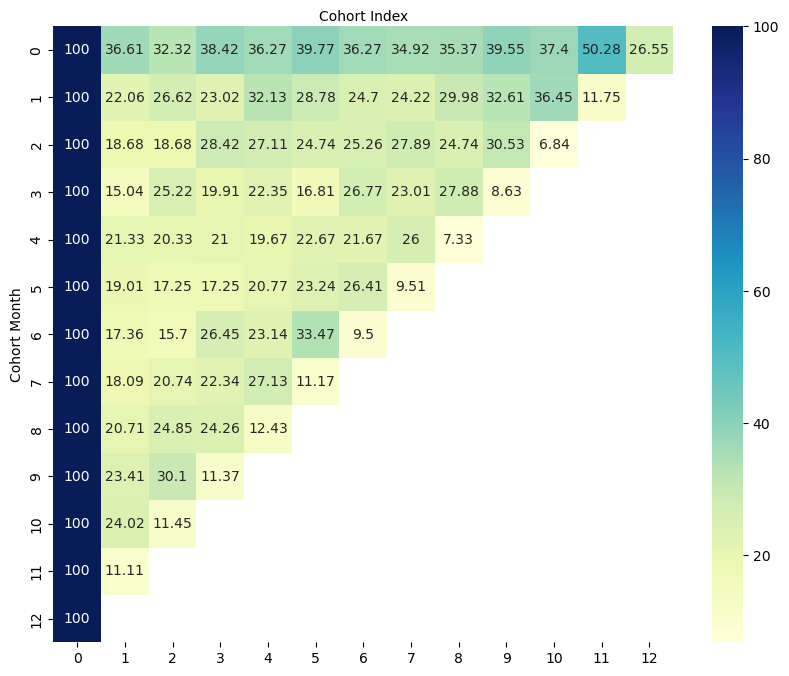

In [38]:
#plot the percentages of customers in each cohort_month and cohort_index
fig, ax = plt.subplots(1,1,figsize = (10,8))

sns.heatmap(df8, annot = True, cmap="YlGnBu", fmt='g')

ax.set_xlabel('Cohort Index')
ax.set_ylabel("Cohort Month")
ax.xaxis.set_label_position('top')

plt.show()